In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
import seffaflik
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [3]:
df_prod = uretim.gerceklesen(baslangic_tarihi='2021-06-01', bitis_tarihi='2021-06-30')

In [8]:
features = [col for col in df_prod.columns if col not in ['Toplam', 'Saat', 'Tarih']]
target = ['Toplam']

In [10]:
X = df_prod.loc[:,features]
y = df_prod.loc[:,target]

In [25]:
len(features)

15

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

see: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [49]:
#pca = PCA(n_components=8) # keep 8 pca components
pca = PCA(.90) # keep a specific number of components for which 95% percent variance is retained

principal_components = pca.fit_transform(X_scaled)

Note that you should fit pca on the training data only! But transform it both on the training and test data

Example:

pca.fit(train_img)

train_img = pca.transform(train_img)

test_img = pca.transform(test_img)

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule.

In [64]:
#pca.inverse_transform(principal_components)

see: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

for inverse_transform

In [50]:
np.shape(principal_components)

(720, 8)

In [55]:
pca.n_components_

8

In [58]:
pca.components_

array([[ 0.33044485,  0.42864292,  0.06006152,  0.03547   ,  0.4276852 ,
         0.18411658,  0.14674373,  0.24471867, -0.43777465, -0.30036045,
        -0.01728779,  0.12670763,  0.        ,  0.        , -0.3251995 ],
       [ 0.17217867, -0.27933595,  0.06088264, -0.59284835, -0.20619778,
        -0.10331827, -0.12353445,  0.27239996,  0.08417821, -0.182588  ,
         0.40543831,  0.3523278 ,  0.        ,  0.        , -0.25603892],
       [ 0.22842362,  0.06874129,  0.29722901,  0.19978178, -0.05175961,
        -0.5748594 ,  0.35300715,  0.40041508,  0.05567235,  0.4364026 ,
         0.04997357, -0.01668624, -0.        , -0.        , -0.02069624],
       [-0.23047151,  0.05877243, -0.59528756, -0.18971484, -0.06246439,
        -0.26069967,  0.5542001 , -0.20265699, -0.309056  ,  0.02310481,
         0.11990735,  0.14788791, -0.        , -0.        ,  0.02641799],
       [ 0.30352457,  0.09982394, -0.51754175,  0.07143431,  0.03272349,
         0.110553  , -0.30801011,  0.24109082, 

In [51]:
principal_df = pd.DataFrame(data=principal_components,
                            columns=['pc1', 'pc2', 'pc3', 'pc4',
                                     'pc5', 'pc6', 'pc7', 'pc8'])

In [60]:
pca.explained_variance_ratio_

array([0.29912164, 0.15216274, 0.1196192 , 0.09329167, 0.07517607,
       0.06225707, 0.05864056, 0.04126824])

In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29912164, 0.45128438, 0.57090358, 0.66419525, 0.73937132,
       0.8016284 , 0.86026896, 0.90153721])

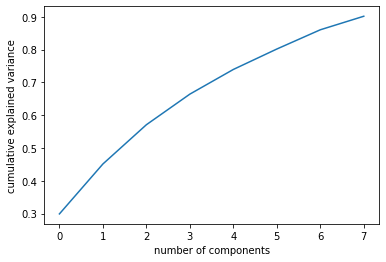

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [53]:
principal_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-0.411622,-1.315360,-0.178959,-0.835240,-0.173356,0.123634,-2.879261,-0.639262
1,-1.465150,-1.164935,-0.219227,-0.778720,-0.010110,0.110433,-2.220836,0.227835
2,-1.896325,-0.824499,-0.510817,-0.702406,-0.045721,0.456415,-1.487156,0.296152
3,-2.026176,-0.579449,-0.449452,-0.676254,-0.312231,0.114385,-1.536479,0.447956
4,-2.171433,-0.382122,-0.439181,-0.654085,0.128651,0.557007,-1.101454,0.301831
...,...,...,...,...,...,...,...,...
715,3.897053,-0.768065,-1.479670,-0.299606,0.188897,-0.154799,0.986969,1.227864
716,3.867461,-0.901830,-1.394484,-0.470294,0.495479,-0.594817,1.249566,1.309041
717,3.678059,-0.923931,-1.711553,-0.252251,-0.143598,-1.537847,1.648399,1.292207
718,3.318890,-0.450955,-1.766570,-0.461220,-0.009900,-0.853676,1.607713,1.871445
